## Kalman filters
Kalman filters are a way of quantifying uncertainty surrounding the internal state of a dynamical system from a noisey signal. Algorithm works in two phases:
1. *Prediction phase*: estimate the current state variables and related uncertainties. 
2. *Update estimate*: take weighted average of state observation and estimate. Larger weight is given to estimates with greater certainty. 

A **state extrapolation** function is produced which is of the form of classic control:
$$ \hat{x}_{n+1,n} = F\hat{x}_{n,n}  + G u_{n} + w_{n} $$ 

In the above, matrices F and G are to be estimated from the **state space**, differential equations. 
$$ \dot{x(t)} = Ax(t) + Bu(t) $$
$$ \dot{y(t)} = Cx(t) + Du(t) $$ 

Distinguishing the differerence between **state extrapolation** and **state space**, the former has output of the same units whereas **state space** are differential equations.


Steps involved in derving the *state dynamics matrix*:
1. Set up *governing equation*, u which is the sum of derivate
2. Isolate the highest order derivative, $\frac{d^{n}x}{dt^n} = \frac{d^{n-1}x}{dt^n-1} + \frac{dx}{dt} + u$
3. Set system of equations where $x_{x+1} = \frac{d^n}{dt^{n}$
4. Set highest $x_{n+1}$ term to $\frac{d^{n-1}x}{dt^n-1} + \frac{dx}{dt} + u$
5. Express this in matrix form $ \dot{x(t)} = Ax(t) + Bu(t) $


Note: to form the weighted sum in uncertainty, the Kalman filter assumes noise to be present in both the *prediction* and *measurement*. The Kalman filter propagates uncertainty recursively and has significant parallels to Bayesian updating.

Higher order dynamical systems can be restructured into 'first order differential equations' by defining new variables and substituting higher order terms. 


What is the state dynamics matrix? A
What is the state transition matrix? F

### Kalman filters

#### Kalman gain
The Kalman gain, K, is used to determine how much of the new measurements to use to update the new estimate. The Kalman Gain is bound between zero and one; \[0,1\]. In essence the Kalman gain is an proportion of error in the estimate compared to measurement. The Kalman Gain is then used to calculate the new estimate which is given by
$$ Est_t = Est_{t-1} + K[Meas - Est_{t-1}] $$ 

When K is close to zero the estimate is stable and measurements are inaccurate, whereas when K is close to 1 difference between measurement and prediction will have large effects on the update. 

#### State matrix
Keeps track of underlyng system dynamics such as position and velocity.

#### Observation matrix
Extracts key variables from process?

#### State covariance and measurement covariance matrices


#### Examples of Kalman filters

### Codified Kalman filter
Below is an example of a Kalman filter codified. Note the State Extrapoloation matrix is assumed as pre-calculated. Therefore the differential equations involved in the System State Representation equations have already been solved and formed into required matrices. 

In [8]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [7]:
x_observations = np.array([4000, 4260, 4550, 4860, 5110])
v_observations = np.array([280, 282, 285, 286, 290])

x_history = []
v_history = [] 


z = np.c_[x_observations, v_observations]

# Initial Conditions
a = 2  # Acceleration
v = 280
t = 1  # Difference in time

# Process / Estimation Errors
error_est_x = 20
error_est_v = 5

# Observation Errors
error_obs_x = 25  # Uncertainty in the measurement
error_obs_v = 6

def prediction2d(x, v, t, a):
    A = np.array([[1, t],
                  [0, 1]])
    X = np.array([[x],
                  [v]])
    B = np.array([[0.5 * t ** 2],
                  [t]])
    X_prime = A.dot(X) + B.dot(a)
    return X_prime


def covariance2d(sigma1, sigma2):
    cov1_2 = sigma1 * sigma2
    cov2_1 = sigma2 * sigma1
    cov_matrix = np.array([[sigma1 ** 2, cov1_2],
                           [cov2_1, sigma2 ** 2]])
    return np.diag(np.diag(cov_matrix))


# Initial Estimation Covariance Matrix
P = covariance2d(error_est_x, error_est_v)
A = np.array([[1, t],
              [0, 1]])

# Initial State Matrix
X = np.array([[z[0][0]],
              [v]])
n = len(z[0])

for data in z[1:]:
    X = prediction2d(X[0][0], X[1][0], t, a)
    # To simplify the problem, professor
    # set off-diagonal terms to 0.
    P = np.diag(np.diag(A.dot(P).dot(A.T)))

    # Calculating the Kalman Gain
    H = np.identity(n)
    R = covariance2d(error_obs_x, error_obs_v)
    S = H.dot(P).dot(H.T) + R
    K = P.dot(H).dot(inv(S))

    # Reshape the new data into the measurement space.
    Y = H.dot(data).reshape(n, -1)

    # Update the State Matrix
    # Combination of the predicted state, measured values, covariance matrix and Kalman Gain
    X = X + K.dot(Y - H.dot(X))
    
    x_history.append(X[0][0])
    v_history.append(X[1][0])
    
    # Update Process Covariance Matrix
    P = (np.identity(len(K)) - K.dot(H)).dot(P)

print("Kalman Filter State Matrix:\n", X)

Kalman Filter State Matrix:
 [[5127.05898493]
 [ 288.55147059]]


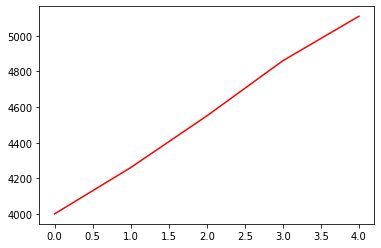

In [9]:
plt.plot(
plt.plot(x_observations, color = 'red')


In [6]:
z

array([[4000,  280],
       [4260,  282],
       [4550,  285],
       [4860,  286],
       [5110,  290]])